In [2]:
file_path = './log/2018-05-18 16:07:04/train.log'
unsupervised_scores = []
unique_nn_precision1 = []
unique_csls_precision1 = []

with open(file_path, 'r') as f:
    for line in f:
        if line.startswith('csls unsupervised metric score'):
            unsupervised_scores.append(float(line.split(':')[1].strip()))
        if line.startswith('1500 unique source words - nn') and 'k = 1:' in line:
            unique_nn_precision1.append(float(line.split(':')[1].strip()))
        if line.startswith('2975 source words - csls_knn_10') and 'k = 1:' in line:
            unique_csls_precision1.append(float(line.split(':')[1].strip()))

In [3]:
assert len(unsupervised_scores) == len(unique_nn_precision1)
assert len(unsupervised_scores) == len(unique_csls_precision1)

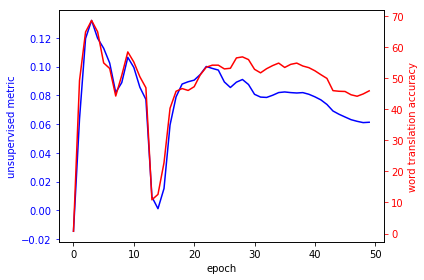

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = [epoch for epoch in range(len(unsupervised_scores))]
fig, ax1 = plt.subplots()
ax1.plot(x, unsupervised_scores, 'b-')
ax1.set_xlabel('epoch')
ax1.set_ylabel('unsupervised metric', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(x, unique_nn_precision1, 'r-')
ax2.set_ylabel('word translation accuracy', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

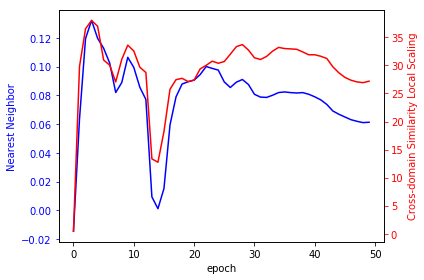

In [6]:
fig, ax1 = plt.subplots()
ax1.plot(x, unsupervised_scores, 'b-')
ax1.set_xlabel('epoch')
ax1.set_ylabel('Nearest Neighbor', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(x, unique_csls_precision1, 'r-')
ax2.set_ylabel('Cross-domain Similarity Local Scaling', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()